# **Applied Machine Learning Homework 5**
**Due 2 May,2022 (Monday) 11:59PM EST**

### Natural Language Processing
We will train a supervised training model to predict if a tweet has a positive or negative sentiment.

####  **Dataset loading & dev/test splits**

**1.1) Load the twitter dataset from NLTK library**

In [1]:

import re
import nltk
import numpy as np
import pandas as pd
nltk.download('stopwords')
nltk.download('twitter_samples')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import twitter_samples 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from nltk.tokenize import sent_tokenize, word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/davitbarblishvili/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/davitbarblishvili/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


**1.2) Load the positive & negative tweets**

In [2]:
all_positive_tweets = twitter_samples.strings('positive_tweets.json')
all_negative_tweets = twitter_samples.strings('negative_tweets.json')


**1.3) Create a development & test split (80/20 ratio):**

In [3]:
#code here
neg_tweet_df = pd.DataFrame(all_negative_tweets, columns=['tweet'])
pos_tweet_df = pd.DataFrame(all_positive_tweets, columns=['tweet'])
pos_tweet_df['sentiment'] = 1
neg_tweet_df['sentiment'] = 0

  
result = pd.concat([pos_tweet_df, neg_tweet_df,])
result


,tweet,sentiment
0,#FollowFriday @France_Inte @PKuchly57 @Milipol...,1
1,@Lamb2ja Hey James! How odd :/ Please call our...,1
2,@DespiteOfficial we had a listen last night :)...,1
3,@97sides CONGRATS :),1
4,yeaaaah yippppy!!! my accnt verified rqst has...,1
...,...,...
4995,I wanna change my avi but uSanele :(,0
4996,MY PUPPY BROKE HER FOOT :(,0
4997,where's all the jaebum baby pictures :((,0
4998,But but Mr Ahmad Maslan cooks too :( https://t...,0


In [4]:
X_dev, X_test, y_dev, y_test = \
    train_test_split(result['tweet'], result['sentiment'], test_size=0.2, random_state=0)

print(X_dev.head())
print('---------------')
print(X_test.head())
print('---------------')
print(y_dev.head())
print('---------------')
print(y_test.head())
print('---------------')

2389    @RafaelAllmark I've been supporting you since ...
4275    @KirkHerbstreit Braxton should have gone pro! ...
2995    @WilliamHC3 Hi! Would you like an @imPastel co...
316                    @BOYBANDSFTCARA sure!!! Sorry :( x
356     Good luck to #LizaMinnelli for her upcoming UK...
Name: tweet, dtype: object
---------------
4394                              rip whitney houston. :(
898     @tmhcuddly I'm so excited, we should definitel...
2398    Yisss! #bindingofissac ! Been waiting for #xbo...
906     Twitter Help Center | Why can&amp;#39;t I foll...
2343    My mister is the best mister :) supportive, ki...
Name: tweet, dtype: object
---------------
2389    0
4275    0
2995    1
316     0
356     1
Name: sentiment, dtype: int64
---------------
4394    0
898     1
2398    1
906     0
2343    1
Name: sentiment, dtype: int64
---------------


#### **Data preprocessing**
We will do some data preprocessing before we tokenize the data. We will remove `#` symbol, hyperlinks, stop words & punctuations from the data. You can use the `re` package in python to find and replace these strings. 

**1.4) Replace the `#` symbol with '' in every tweet**

In [5]:
#code here
X_dev.replace(to_replace="\#", value=r"''", regex=True, inplace=True)
X_dev


2389    @RafaelAllmark I've been supporting you since ...
4275    @KirkHerbstreit Braxton should have gone pro! ...
2995    @WilliamHC3 Hi! Would you like an @imPastel co...
316                    @BOYBANDSFTCARA sure!!! Sorry :( x
356     Good luck to ''LizaMinnelli for her upcoming U...
                              ...                        
4225          @Jenna_Marbles I wish I could've met you :(
4859    Computer ''sex? Count me in ! :) ''funny ''vin...
3264    @ghostfinder no worries :) I don't blame you h...
4845                     @FurretTails awww poor bunny. :(
2732                               @Korku_3 thanks bro :)
Name: tweet, Length: 8000, dtype: object

In [6]:
#code here
X_test.replace(to_replace="\#", value=r"''", regex=True, inplace=True)
X_test


4394                              rip whitney houston. :(
898     @tmhcuddly I'm so excited, we should definitel...
2398    Yisss! ''bindingofissac ! Been waiting for ''x...
906     Twitter Help Center | Why can&amp;''39;t I fol...
2343    My mister is the best mister :) supportive, ki...
                              ...                        
1037    @marshyymiullow you have a weird DP, you know? :p
2899                         @PhilRAWRLester okay then :)
4549                    2 bach :( https://t.co/dPRNCcNEZd
2740    Look what arrived for me today... Super thanks...
1690    Rly sad that I had to rush off when that was t...
Name: tweet, Length: 2000, dtype: object

**1.5) Replace hyperlinks with '' in every tweet**

In [7]:
#code here
X_dev.replace(to_replace="\#", value=r"", regex=True, inplace=True)

X_dev = \
    X_dev.str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
                                '', regex=True)
X_dev


2389    @RafaelAllmark I've been supporting you since ...
4275    @KirkHerbstreit Braxton should have gone pro! ...
2995    @WilliamHC3 Hi! Would you like an @imPastel co...
316                    @BOYBANDSFTCARA sure!!! Sorry :( x
356     Good luck to ''LizaMinnelli for her upcoming U...
                              ...                        
4225          @Jenna_Marbles I wish I could've met you :(
4859    Computer ''sex? Count me in ! :) ''funny ''vin...
3264    @ghostfinder no worries :) I don't blame you h...
4845                     @FurretTails awww poor bunny. :(
2732                               @Korku_3 thanks bro :)
Name: tweet, Length: 8000, dtype: object

In [8]:
#code here
X_test.replace(to_replace="\#", value=r"", regex=True, inplace=True)

X_test = \
    X_test.str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', 
                                '', regex=True)
X_test

4394                              rip whitney houston. :(
898     @tmhcuddly I'm so excited, we should definitel...
2398    Yisss! ''bindingofissac ! Been waiting for ''x...
906     Twitter Help Center | Why can&amp;''39;t I fol...
2343    My mister is the best mister :) supportive, ki...
                              ...                        
1037    @marshyymiullow you have a weird DP, you know? :p
2899                         @PhilRAWRLester okay then :)
4549                                           2 bach :( 
2740    Look what arrived for me today... Super thanks...
1690    Rly sad that I had to rush off when that was t...
Name: tweet, Length: 2000, dtype: object

**1.6) Remove all stop words**

In [9]:
#code here
stop = stopwords.words('english')
X_dev = \
    X_dev.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_dev

2389    @RafaelAllmark I've supporting since start ALW...
4275    @KirkHerbstreit Braxton gone pro! :( I feel ba...
2995    @WilliamHC3 Hi! Would like @imPastel concert? ...
316                    @BOYBANDSFTCARA sure!!! Sorry :( x
356     Good luck ''LizaMinnelli upcoming UK appearanc...
                              ...                        
4225              @Jenna_Marbles I wish I could've met :(
4859         Computer ''sex? Count ! :) ''funny ''vintage
3264              @ghostfinder worries :) I blame haha! X
4845                     @FurretTails awww poor bunny. :(
2732                               @Korku_3 thanks bro :)
Name: tweet, Length: 8000, dtype: object

In [10]:
#code here
stop = stopwords.words('english')
X_test = \
    X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_test

4394                              rip whitney houston. :(
898            @tmhcuddly I'm excited, definitely meet :)
2398    Yisss! ''bindingofissac ! Been waiting ''xboxo...
906     Twitter Help Center | Why can&amp;''39;t I fol...
2343    My mister best mister :) supportive, kind, abs...
                              ...                        
1037                   @marshyymiullow weird DP, know? :p
2899                              @PhilRAWRLester okay :)
4549                                            2 bach :(
2740    Look arrived today... Super thanks Edwin Elven...
1690    Rly sad I rush last time I would see everyone :-(
Name: tweet, Length: 2000, dtype: object

**1.7) Remove all punctuations**

In [11]:
#code here
X_dev = \
    X_dev.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_dev = X_dev.str.replace('[^\w\s]','', regex=True)
X_dev


2389    RafaelAllmark Ive supporting since start ALWAY...
4275    KirkHerbstreit Braxton gone pro  I feel bad hi...
2995    WilliamHC3 Hi Would like imPastel concert Let ...
316                          BOYBANDSFTCARA sure Sorry  x
356     Good luck LizaMinnelli upcoming UK appearances...
                              ...                        
4225                  Jenna_Marbles I wish I couldve met 
4859                   Computer sex Count   funny vintage
3264                  ghostfinder worries  I blame haha X
4845                         FurretTails awww poor bunny 
2732                                  Korku_3 thanks bro 
Name: tweet, Length: 8000, dtype: object

In [12]:
#code here
X_test = \
    X_test.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
X_test = X_test.str.replace('[^\w\s]','', regex=True)
X_test

4394                                 rip whitney houston 
898                 tmhcuddly Im excited definitely meet 
2398    Yisss bindingofissac  Been waiting xboxone rel...
906     Twitter Help Center  Why canamp39t I follow pe...
2343    My mister best mister  supportive kind absolut...
                              ...                        
1037                       marshyymiullow weird DP know p
2899                                 PhilRAWRLester okay 
4549                                              2 bach 
2740    Look arrived today Super thanks Edwin Elvena E...
1690       Rly sad I rush last time I would see everyone 
Name: tweet, Length: 2000, dtype: object

**1.8) Apply stemming on the development & test datasets using Porter algorithm**

In [13]:
#code here
ps = PorterStemmer()

def stem_sentences(sentence):
    tokens = sentence.split()
    stemmed_tokens = [ps.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

X_dev = X_dev.apply(stem_sentences)
X_dev


2389    rafaelallmark ive support sinc start alway ign...
4275    kirkherbstreit braxton gone pro i feel bad him...
2995    williamhc3 hi would like impastel concert let ...
316                           boybandsftcara sure sorri x
356     good luck lizaminnelli upcom uk appear garyjho...
                              ...                        
4225                      jenna_marbl i wish i couldv met
4859                        comput sex count funni vintag
3264                       ghostfind worri i blame haha x
4845                           furrettail awww poor bunni
2732                                    korku_3 thank bro
Name: tweet, Length: 8000, dtype: object

In [14]:
X_test = X_test.apply(stem_sentences)
X_test


4394                                  rip whitney houston
898                       tmhcuddli im excit definit meet
2398    yisss bindingofissac been wait xboxon releas w...
906     twitter help center whi canamp39t i follow peo...
2343    my mister best mister support kind absolut amaz 3
                              ...                        
1037                       marshyymiullow weird dp know p
2899                                    philrawrlest okay
4549                                               2 bach
2740    look arriv today super thank edwin elvena emc ...
1690         rli sad i rush last time i would see everyon
Name: tweet, Length: 2000, dtype: object

#### **Model training**

**1.9) Create bag of words features for each tweet in the development dataset**

In [15]:
#code here
vectorizer = CountVectorizer()
dev_x = vectorizer.fit_transform(X_dev)
test_x = vectorizer.transform(X_test)

print(f"dev_x.shape= {dev_x.shape}")
print(f"test_x.shape = {dev_x.shape}")


dev_x.shape= (8000, 14731)
test_x.shape = (8000, 14731)


**1.10) Train a supervised learning model of choice on the development dataset**

In [16]:
#code here
model1 = LogisticRegressionCV(max_iter=1000)
model1.fit(dev_x, y_dev)


LogisticRegressionCV(max_iter=1000)

In [17]:
score_model1 = model1.score(test_x, y_test)
print(score_model1)


0.75


In [18]:
 pred_regular = model1.predict(test_x)

**1.11) Create TF-IDF features for each tweet in the development dataset**

In [19]:
#code here
tfIdfVectorizer=TfidfVectorizer(use_idf=True)
tfIdf_x_train = tfIdfVectorizer.fit_transform(X_dev)
tfIdf_x_test = tfIdfVectorizer.transform(X_test)


**1.12) Train the same supervised learning algorithm on the development dataset with TF-IDF features**

In [20]:
#code here
model2 = LogisticRegressionCV(max_iter=1000)
model2.fit(tfIdf_x_train, y_dev)


LogisticRegressionCV(max_iter=1000)

**1.13) Compare the performance of the two models on the test dataset**

In [21]:
#code here
score_model2 = model2.score(tfIdf_x_test, y_test)
print(score_model2)


0.7595


In [22]:
 pred_tfidf = model2.predict(test_x)

In [23]:
print(f"Logistic Regression without TF-IDF Features = {score_model1 * 100}%")
print(f"Logistic Regression with TF-IDF Features = {round(score_model2 * 100, 2)}%")


Logistic Regression without TF-IDF Features = 75.0%
Logistic Regression with TF-IDF Features = 75.95%


In [24]:
from sklearn import metrics

In [25]:
report = metrics.classification_report(
        y_test, pred_regular,  output_dict=True)

In [26]:
report

{'0': {'precision': 0.7415094339622641,
  'recall': 0.7766798418972332,
  'f1-score': 0.7586872586872586,
  'support': 1012},
 '1': {'precision': 0.7595744680851064,
  'recall': 0.7226720647773279,
  'f1-score': 0.7406639004149378,
  'support': 988},
 'accuracy': 0.75,
 'macro avg': {'precision': 0.7505419510236853,
  'recall': 0.7496759533372805,
  'f1-score': 0.7496755795510982,
  'support': 2000},
 'weighted avg': {'precision': 0.7504335608189483,
  'recall': 0.75,
  'f1-score': 0.7497837197007321,
  'support': 2000}}

In [27]:
report1 = metrics.classification_report(
        y_test, pred_tfidf,  output_dict=True)

In [28]:
report1

{'0': {'precision': 0.750968992248062,
  'recall': 0.7658102766798419,
  'f1-score': 0.7583170254403131,
  'support': 1012},
 '1': {'precision': 0.7551652892561983,
  'recall': 0.7398785425101214,
  'f1-score': 0.7474437627811861,
  'support': 988},
 'accuracy': 0.753,
 'macro avg': {'precision': 0.7530671407521301,
  'recall': 0.7528444095949817,
  'f1-score': 0.7528803941107496,
  'support': 2000},
 'weighted avg': {'precision': 0.7530419629700814,
  'recall': 0.753,
  'f1-score': 0.7529456336867043,
  'support': 2000}}

In [29]:
print(f"Logistic Regression without TF-IDF Features accuracy = {report['accuracy']} \
    f1_score = {report['macro avg']['f1-score']}, ")

Logistic Regression without TF-IDF Features accuracy = 0.75     f1_score = 0.7496755795510982, 


In [30]:
print(f"Logistic Regression with TF-IDF Features accuracy = {report1['accuracy']} \
    f1_score = {report1['macro avg']['f1-score']}, ")

Logistic Regression with TF-IDF Features accuracy = 0.753     f1_score = 0.7528803941107496, 


## TF-IDF scores have an accuracy of 75.95% and the non-tf-idf has a 75% accuracy, so the TFIDF slightly outperforms the first model. 
## also f1 score of tf-idf model is little higher than the one without.  Same applies to precision and recall


In [31]:
print(f"Logistic Regression without TF-IDF Features precision = {report['1']['precision']} \
    recall = {report['1']['recall']}, ")

Logistic Regression without TF-IDF Features precision = 0.7595744680851064     recall = 0.7226720647773279, 


In [32]:
print(f"Logistic Regression with TF-IDF Features precision = {report1['1']['precision']} \
    recall = {report1['1']['recall']}, ")

Logistic Regression with TF-IDF Features precision = 0.7551652892561983     recall = 0.7398785425101214, 


In [33]:
# clearly the classification report shows that the model with tf idf features performs better

## model without tf-idf

In [34]:
import seaborn as sns


<AxesSubplot:>

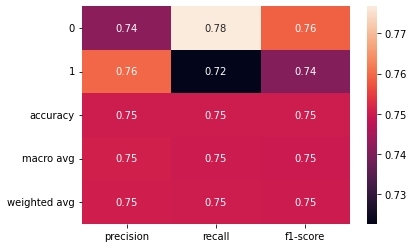

In [35]:
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

## model with tf-idf

<AxesSubplot:>

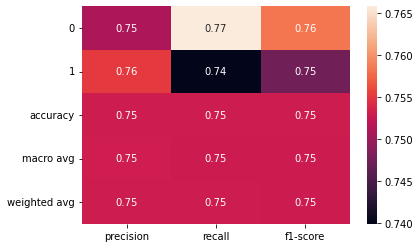

In [36]:
sns.heatmap(pd.DataFrame(report1).iloc[:-1, :].T, annot=True)